In [36]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

### XML(Extension Markup Language)


    1.특징
        1) 메타 언어 : GML -> SGML -> XML
        2) 데이터를 위한 언어
        3) 데이터베이스 용도
        4) 데이터 표준화 : 이 기종 시스템간의 정보교환, 웹서비스, 유비쿼터스, 사물인터넷 기타등등...
    
    2. 문법(물리적인 구성요소)
        1) XML(.xml)
        2) DTD(.dtd) : XML 작성을 위한 설계문서
        3) XML Schema(.xsd) : XML 작성을 위한 설계문서
        4) XSL(.xsl, xslt) : XML문서에 스타일을 입혀주는 언어
        
    3. 결과 문서의 종류
        1) Well-Formed XML Document(잘 짜여진 문서)
        2) Valid XML Document(유효한 문서)
   
    4. Element 문법
        - 작성 규칙
            a) 모든 XML문서는 반드시 단 하나의 루트 엘리먼트를 가진다.
            b) 루트 엘리먼트는 여러 개의 자식 엘리먼트를 가질 수 있고
                또 그 자식도 자신의 자식을 가질 수 있다.
            c) 시작태그와 끝태그는 반드시 짝을 이루어야 한다.
            d) "<"는 값으로 사용 불가. ">"는 사용할 수 있으나 가급적 사용 금지
            e) "<"와 ">" 다음에 공백문자가 올 수 없으며 반드시 시작태그와 끝태그의 이름이 같아야 한다.

        - 종류
            a) 내용을 가지는 엘리먼트
            b) 내용이 없는 엘리먼트

        - 내용에 대한 종류
            a) 문자 데이터
            b) 자식 엘리먼트
            c) 엔티티 또는 문자 참조
            d) CDATA Section
            e) 프로세싱 지시자
            f) 주석 : <!-- 주석 내용 -->
            g) 공백 문자열

    5. DTD 
        - 종류
            내부 DTD
            외부 DTD
        
        - 구성 요소
            엘리먼트 선언
            속성(attribute) 선언
            Entity 선언
            Notation 선언
            프로세싱 지시자
            파라미터 엔티티 참조
            주석
            공백
            conditional section

        - 문서 유형 선언
            <!DOCTYPE 루트엘리먼트명 SYSTEM 또는 PUBLIC "식별자">
                DOCTYPE은 반드시 대문자
                SYSTEM은 특정 단체나 업체내부에서 사용되는 경우
                PUBLIC은 공개
                식별자는 다운로드 받을 수 있는 경로
                PUBLIC일 경우 추가된 식별자
                +-//DTD를 개발 및 유지보수 업체명//DTD명 및 버전번호//사용된 언어

        - 엘리먼트 선언
            <!ELEMENT 엘리먼트명 컨텐트 유형>
                컨텐트 유형
                    #PCDATA	: 내용으로 문자데이터만 갖는 엘리먼트
                    자식 엘리먼트
                        , : 작성 순서
                        | : 선택
                        ? : 생략하거나 한번만 작성
                        + : 한번 이상
                        * : 생략하거나 여러번 작성
                        기호 없음 : 단 한번만 작성
                    EMPTY
                    MIXED : 문자데이터 또는 자식엘리먼트를 혼합형태
                    ANY

        - ATTRIBUTE 선언
            <!ATTLIST 엘리먼트명 속성명 속성유형 디폴트선언>
                속성 유형
                    CDATA :  문자 데이터
                    ENUMERATION	: dtd에 나열된 값 중 하나가 와야 함
                    ID : 유일한 값을 지정
                    IDREF/IDREFS : ID값을 참조
                    NMTOKEN/NMTOKENS : 이름 작성 규칙을 준수하는 데이터만 사용
                    NOTATION : dtd에 명시적으로 선언된 notation만 사용가능
                    ENTITY : dtd에 명시적으로 선언된 entity만 사용 가능
                    
        - validation check
            https://www.xmlvalidation.com/

    6. 네임 스페이스
        CML
        -----
            <?xml version=1.0>
            <정보>
                <고유번호>111111-1111111</고유번호>
                <이름>홍길동</이름>
                ...
            </정보>

        PML
        -----
            <?xml version=1.0>
            <정보>
                <고유번호>LC100</고유번호>
                <이름>캠코더</이름>
                ...
            </정보>

        OML
        -----
            <?xml version=1.0>
            <주문정보 xmlns:고객="http://www.a.com/2017/Custom"
                xmlns:상품="http://www.a.com/2017/Product"
                xmlns="http://www.a.com/2017/Order">
                <주문번호>1</주문번호>
                <주문수량>10</주문수량>
                <결제>
                    <방법>현금</방법>
                    <금액>10000000</금액>
                </결제>

                <고객:고유번호>111111-1111111</고객:고유번호>
                <고객:이름>홍길동</고객:이름>

                <상품:고유번호>LC100</상품:고유번호>
                <상품:이름>캠코더</상품:이름>
                ...
            </주문정보>

In [4]:
import xml.etree.ElementTree as elemTree

# XML을 parsing하는 방법
# 1. xml파일로 존재하는 경우 : parse()
# 2. xml 문자열로 존재하는 경우 : fromstring()

#### xml 데이터 불러오기

In [6]:
tree1 = elemTree.parse("C:/Users/user/Documents/jun/analysis/data/users.xml")
tree1

In [7]:
xmlstr = """<?xml version="1.0" encoding="utf-8" ?>
<users>
	<user grade="gold">
            <name>Kim Cheol Soo</name>
            <age>25</age>
            <birthday>19940215</birthday>
        </user>
        <user grade="diamond">
            <name>Kim Yoo Mee</name>
            <age>21</age>
            <birthday>19980417</birthday>
        </user>
</users>
"""

tree2 = elemTree.fromstring(xmlstr)
tree2

<Element 'users' at 0x00000146D79E4BD0>

#### xml 데이터 다루기

In [8]:
###### 태그명 검색
# XPath : ./, ../

#data = tree1.find("user")
#data = tree1.find("user[1]")
#data = tree1.find("user[2]")
data = tree1.find("./user[1]")
data
type(data)
dir(data)
print(data.tag)
print(data.attrib)
print(data.get("grade"))

print("--------------------")

username = data.find("name")
print(username.tag)
print(username.attrib)
print(username.text)

print("--------------------")

userage = data.find("age")
print(userage.text)

user
{'grade': 'gold'}
gold
--------------------
name
{}
Kim Cheol Soo
--------------------
25


In [9]:
###### 태그 조건으로 검색
#data = tree1.find("./user[@grade]")
#data = tree1.find("./user[@grade][1]")
#data = tree1.find("./user[@grade][2]")
data = tree1.find("./user[@grade='diamond']")
data.attrib

{'grade': 'diamond'}

In [10]:
###### 여러 개의 태그를 한꺼번에 가져오기
users = tree1.findall("./user")
users

for user in users:
    print(user.attrib)
    print(user.find("name").text)

{'grade': 'gold'}
Kim Cheol Soo
{'grade': 'diamond'}
Kim Yoo Mee


In [11]:
###### 그외 기타 api

t = tree1.getroot()
print(t)
print(t.tag)
print(t.attrib)

print("----------------------")

u1 = t.find("./user")
print(u1.get("grade"))
print(u1.keys())
print(u1.items())

<Element 'users' at 0x00000146D7A21130>
users
{}
----------------------
gold
['grade']
[('grade', 'gold')]


---
### JSON

In [12]:
import json

# dumps() : 데이터를 저장
# loads() : 데이터를 불러올 때

In [13]:
j1 = {"name":"홍길동", "birth":"0519", "age":20}
print(type(j1))
print(j1)

print("----------------------")

# j2 = json.dumps(j1)
j2 = json.dumps(j1, indent=2)
print(type(j2))
print(j2)

print("----------------------")

# 리스트나 튜플로 json으로 변환
print(json.dumps([1, 2, 3]))
print(json.dumps((1, 2, 3)))

print("----------------------")

j3 = json.loads(j2)
print(type(j3))
print(j3)

<class 'dict'>
{'name': '홍길동', 'birth': '0519', 'age': 20}
----------------------
<class 'str'>
{
  "name": "\ud64d\uae38\ub3d9",
  "birth": "0519",
  "age": 20
}
----------------------
[1, 2, 3]
[1, 2, 3]
----------------------
<class 'dict'>
{'name': '홍길동', 'birth': '0519', 'age': 20}


In [14]:
obj = """
{
	"id": "0001",
	"type": "donut",
	"name": "Cake",
	"ppu": 0.55,
	"batters":
		{
			"batter":
				[
					{ "id": "1001", "type": "Regular" },
					{ "id": "1002", "type": "Chocolate" },
					{ "id": "1003", "type": "Blueberry" },
					{ "id": "1004", "type": "Devil's Food" }
				]
		},
	"topping":
		[
			{ "id": "5001", "type": "None" },
			{ "id": "5002", "type": "Glazed" },
			{ "id": "5005", "type": "Sugar" },
			{ "id": "5007", "type": "Powdered Sugar" },
			{ "id": "5006", "type": "Chocolate with Sprinkles" },
			{ "id": "5003", "type": "Chocolate" },
			{ "id": "5004", "type": "Maple" }
		]
}
"""

In [15]:
print(type(obj))

<class 'str'>


In [16]:
result = json.loads(obj)
print(type(result))
print(result)

print("-----------------------------------------------------------------")

print(result["id"])

print("-----------------------------------------------------------------")

print(result["batters"]["batter"][0]["id"])

<class 'dict'>
{'id': '0001', 'type': 'donut', 'name': 'Cake', 'ppu': 0.55, 'batters': {'batter': [{'id': '1001', 'type': 'Regular'}, {'id': '1002', 'type': 'Chocolate'}, {'id': '1003', 'type': 'Blueberry'}, {'id': '1004', 'type': "Devil's Food"}]}, 'topping': [{'id': '5001', 'type': 'None'}, {'id': '5002', 'type': 'Glazed'}, {'id': '5005', 'type': 'Sugar'}, {'id': '5007', 'type': 'Powdered Sugar'}, {'id': '5006', 'type': 'Chocolate with Sprinkles'}, {'id': '5003', 'type': 'Chocolate'}, {'id': '5004', 'type': 'Maple'}]}
-----------------------------------------------------------------
0001
-----------------------------------------------------------------
1001


---
### BeautifulSoup

#### 웹 소스 읽기

In [17]:
from urllib.request import urlopen

In [18]:
html = urlopen("http://google.com")
print(type(html))
print(html.read())

<class 'http.client.HTTPResponse'>
b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="OnMBq5LedNUl7orxRihFkA==">(function(){window.google={kEI:\'JW7wX6XFIvCEr7wP88S-4Ag\',kEXPI:\'0,1359409,731,223,5105,206,3204,10,1144,82,364,1499,817,383,246,5,1354,1300,3114,3,65,769,217,1263,861,232,1336,1430,7,1038,1085,2050,1112996,1233,1196523,527,7,328977,13677,4855,32692,16111,19401,9286,9188,8384,4859,1361,9291,3026,4741,6,12835,4020,978,7931,5297,2974,873,38,4154,6430,7432,7096,4516,2778,919,2277,8,2796,1593,1279,2212,530,149,1103,840,517,513,1009,158,4100,312,1137,2,2063,606,2024,1776,520,1947,2229,94,327,1284,2943,2247,3599,3227,2845,7,5599,6755,5096,7876,3748,1181,108,3407,908,2,941,2614,2397,7468,3277,3,346,230,970,865,2550,2074,149,5990,7985,4,1328,122,78,23

In [19]:
from urllib.error import HTTPError, URLError

try:
    html = urlopen("https://www.naverabcde.com/index.jsp")
except HTTPError as e:
    print("HTTP Error 입니다. : " + str(e))
except URLError as e:
    print("URL Error 입니다. : " + str(e))
else:
    print(html.read())

URL Error 입니다. : <urlopen error [Errno 11001] getaddrinfo failed>


In [21]:
###### 이미지 가져오기

import urllib.request as req

req.urlretrieve("https://t1.daumcdn.net/daumtop_chanel/op/20200723055344399.png",
               "C:/Users/user/Documents/jun/analysis/data/daum.png")
print("저장 되었습니다.")

저장 되었습니다.


In [22]:
img = urlopen("https://t1.daumcdn.net/daumtop_chanel/op/20200723055344399.png")
img = img.read()
img

f = open("C:/Users/user/Documents/jun/analysis/data/daum2.png", "wb")
f.write(img)
print("저장되었습니다.")
f.close()

저장되었습니다.


In [23]:
import urllib.parse

In [24]:
# http://www.weather.go.kr/weather/lifenindustry/sevice_rss.jsp
# http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109

api = "http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp"
value = {"stnId":109}

params = urllib.parse.urlencode(value)
print(params)

url = api + "?" + params
print(url)

data = urlopen(url).read()
# print(data)
data = data.decode("utf-8")
print(data)

stnId=109
http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2021년 01월 02일 (토)요일 18:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>서울,경기도 육상 중기예보 - 2021년 01월 02일 (토)요일 18:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</guid>
<description>
	<header>
		<title>서울,경기도 육상중기예보</title>
		<tm>202101021800</tm>
		<wf><![CDATA[○ (강수) 5일(화) 새벽 한때 눈이 내리겠고, 6일(수) 오후에는 눈이 내리겠습니다.<br />○ (기온) 5일(화) 아침 기온은 -10~-5도로 오늘(2일, -14~-7도)보다 높겠고, 낮 기온은 -4~-1도로 오늘(2일, -2~0도)보다 조금 낮겠습니다.<br />          6일(수)~12일(화)은 기온이 크게 떨어져 아침 기온은 -21~-6도, 낮 기온은 -10~0도로 오늘보다 낮겠고, 경기내륙은 -15도 이하로 떨어지는 곳이 많아 매우 춥겠습니다.<br />○ (해상) 

### BeatifulSoup 사용법

In [25]:
from bs4 import BeautifulSoup

In [26]:
page = open("C:/Users/user/Documents/jun/analysis/data/test_first.html").read()
page

soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by PinkWink
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://www.pinkwink.kr" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>


In [27]:
list(soup.children)
list(soup.children)[0]
list(soup.children)[1]
list(soup.children)[2]


<html><head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>

In [29]:
html = list(soup.children)[2]
list(html.children)
list(html.children)[0]
body = list(html.children)[1]
list(body.children)

AttributeError: 'NavigableString' object has no attribute 'children'

In [30]:
# 태그명으로 접근
soup.head
soup.body
soup.body.div
soup.body.div.p

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

In [31]:
# find(), find_all()

soup.find("p")
soup.find_all("p")

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>,
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

In [32]:
soup.find("p",class_="outer-text")

<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>

In [33]:
soup.find("p",id="second")

<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>

In [34]:
soup.head
soup.head.next_sibling

soup.body
soup.body.previous_sibling

soup.body.previous_sibling.next_sibling

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

In [35]:
# 데이터(Text Node) 가져오기

soup.html.get_text()
soup.head.get_text()
soup.title.get_text()
soup.div.get_text()
soup.p.get_text()

for p in soup.find_all("p"):
    print(p.get_text())


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



In [36]:
# 속성에 접근하기
ln = soup.find("a")
ln

ln["href"]

links = soup.find_all("a")

for link in links:
    print(link["href"])
    

http://www.pinkwink.kr
https://www.python.org


# 실습예제

## 네이버에서 환율정보 가져오기

In [37]:
from urllib.request import urlopen
url = "https://finance.naver.com/marketindex/"
page = urlopen(url)
page

soup = BeautifulSoup(page, "html.parser")
soup


<script language="javascript" src="/template/head_js.nhn?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market"></script>
<script src="/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript"></script>
<script src="/js/jindo.1.5.3.element-text-patch.js" type="text/javascript"></script>
<div id="container" style="padding-bottom:0px;">
<div class="market_include">
<div class="market_data">
<div class="market1">
<div class="title">
<h2 class="h_market1"><span>환전 고시 환율</span></h2>
</div>
<!-- data -->
<div class="data">
<ul class="data_lst" id="exchangeList">
<li class="on">
<a class="head usd" href="/marketindex/exchangeDetail.nhn?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
<h3 class="h_lst"><span class="blind">미국 USD</span></h3>
<div class="head_info point_up">
<span class="value">1,088.00</span>
<span class="txt_krw"><span class="blind">원</span></span>
<span class="change">0.50</span>
<span class="blind">상승</span>
</div>
</a>
<a cl

In [38]:
span = soup.find_all("span", class_="value")
span
print("미 환율: ", span[0].get_text())

미 환율:  1,088.00


In [39]:
div = soup.find_all("div",class_="head_info")
span = div[0].find_all("span")
span
print("미 환율: ", span[0].get_text())

미 환율:  1,088.00


In [40]:
span = soup.select_one("div.head_info > span.value")
span.get_text()

'1,088.00'

#### 파이썬 스크래핑 연습
+ http://www.pythonscraping.com/pages/warandpeace.html

In [41]:
url = "https://www.pythonscraping.com/pages/warandpeace.html"
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")


In [42]:
# 녹색 단어만 골라오기
soup

#green = soup.find_all("span", class_="green")
#for i in green:
#    print(i.get_text())
    
#green = soup.select("div#text > span.green")
#for g in green:
#    print(g.get_text())

green = soup.find_all("span", {"class":"green"})
for g in green:
    print(g.get_text())


Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


In [43]:
# 제목 추출
# h1 ~ h6

titles = soup.find_all(["h1","h2","h3"])
print([title for title in titles])

[<h1>War and Peace</h1>, <h2>Chapter 1</h2>]


In [44]:
# 녹색과 적색단어 추출
 

green_red = soup.find_all("span", {"class":{"green","red"}})
print([text for text in green_red])

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>, <span class="green">Anna
Pavlovna Scherer</span>, <span class="green">Empress Marya
Fedorovna</span>, <span class="green">Prince Vasili Kuragin</span>, <span class="green">Anna Pavlovna</span>, <span class="green">St. Petersburg</span>, <span class="red">If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.</span>, <span class="red">Heavens! w

+ http://www.pythonscraping.com/pages/page3.html

In [56]:
url = "http://www.pythonscraping.com/pages/page3.html"
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

In [57]:
# 제목행은 건너 뛰고 나머지 모든 행 리스트를 수집

#tr = soup.find_all("tr", {"class": "gift"})

#for i in tr:
#    print(i.get_text())


tb = soup.find("table",{"id":"giftList"}).tr.next_siblings
#list(tb)
for tr in tb:
    print(tr)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

In [58]:
#가격중에 $15.00 수집
# pr = soup.find("tr",{"id":"gift"}).td.next_sibling.next_sibling
# print(pr)

#vege = soup.find("tr",{"id":"gift"})
#vege
#print(vege.td.next_sibling.next_sibling.get_text())

print(soup.find('img',{'src':'../img/gifts/img1.jpg'}).parent.previous_siblng.get_text())

AttributeError: 'NoneType' object has no attribute 'get_text'

### 영화평점분석

http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806 

In [59]:
url = 'http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806'
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

In [60]:
# 영화 제목 (url페이지에 해당하는) 수집
soup.find_all("div", "tit5")
print(len(soup.find_all('div', 'tit5')))
soup.find_all('div','tit5')[0].a.get_text()

47


'다크 나이트'

In [61]:
# 포인트 수집
soup.find_all('td', 'point')[0].get_text()

'9.32'

In [62]:
movie_name = [soup.find_all('div','tit5')[n].a.get_text() for n in range(0,47)]
movie_point = [soup.find_all('td','point')[n].get_text() for n in range(0,47)]

In [63]:
movie_name
movie_point

['9.32',
 '9.27',
 '9.25',
 '9.24',
 '9.23',
 '9.23',
 '9.21',
 '9.20',
 '9.18',
 '9.14',
 '9.10',
 '9.10',
 '9.09',
 '9.08',
 '9.05',
 '9.05',
 '9.02',
 '9.00',
 '8.93',
 '8.91',
 '8.90',
 '8.87',
 '8.86',
 '8.83',
 '8.76',
 '8.75',
 '8.73',
 '8.70',
 '8.62',
 '8.59',
 '8.58',
 '8.48',
 '8.48',
 '8.47',
 '8.39',
 '8.34',
 '8.32',
 '8.12',
 '7.97',
 '7.84',
 '7.39',
 '7.26',
 '6.97',
 '6.59',
 '6.09',
 '5.17',
 '5.00']

In [64]:
# 2017년 5월 1일부터 100일간의 데이터 수집

daterange = pd.date_range("2017-5-1", periods=100, freq="D")
daterange

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [65]:
from tqdm import tqdm_notebook
import urllib

In [66]:
movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(daterange):
    url = 'http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    page = urlopen(url.format(date=urllib.parse.quote(today.strftime("%Y%m%d"))))
    soup = BeautifulSoup(page, 'html.parser')
    
    cnt = len(soup.find_all('td','point'))
    
    movie_date.extend([today for n in range(0, cnt)])
    movie_name.extend([soup.find_all('div','tit5')[n].a.get_text() for n in range(0,cnt)])
    movie_point.extend([soup.find_all('td','point')[n].get_text() for n in range(0,cnt)])

<ipython-input-66-7ba1869d597c>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for today in tqdm_notebook(daterange):


In [67]:
urllib.parse.quote(daterange[0].strftime('%Y%m%d')) #날짜를 문자열로 바꾸고,''없애는 작업(urllib.parse.quote)

'20170501'

In [68]:
len(movie_date), len(movie_name), len(movie_point)

(4723, 4723, 4723)

In [69]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie.head()
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


In [70]:
# 포인트의 타입을 정수형에서 실수형으로 변환
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [71]:
# 영화별로 점수의 합계를 보고싶다.(합계가 높은 순 또는 낮은 순)
m_point = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
m_point.head()

#상위 10개
m_best = m_point.sort_values(by='point', ascending=False)
m_best.head(10)

#하위 10개
m_worse = m_point.sort_values(by='point', ascending=True)
m_worse.head(10)

,point
name,
애나벨,6.92
비포 선셋,8.74
본 투 비 블루,8.77
짱구는 못말려 극장판: 폭풍수면! 꿈꾸는 세계 대돌격,8.85
비포 선라이즈,8.90
로건,9.06
더 록,9.30
사랑은 비를 타고,9.31
인생은 아름다워,9.38


In [72]:
# 특정 영화만 추려서 보고 싶을 때
tmp = movie.query("name==['겟 아웃']")
tmp.head(10)

,date,name,point
833,2017-05-17,겟 아웃,8.36
889,2017-05-18,겟 아웃,8.18
933,2017-05-19,겟 아웃,8.20
980,2017-05-20,겟 아웃,8.18
1022,2017-05-21,겟 아웃,8.18
1061,2017-05-22,겟 아웃,8.11
1102,2017-05-23,겟 아웃,8.15
1146,2017-05-24,겟 아웃,8.15
1192,2017-05-25,겟 아웃,8.15
1236,2017-05-26,겟 아웃,8.16


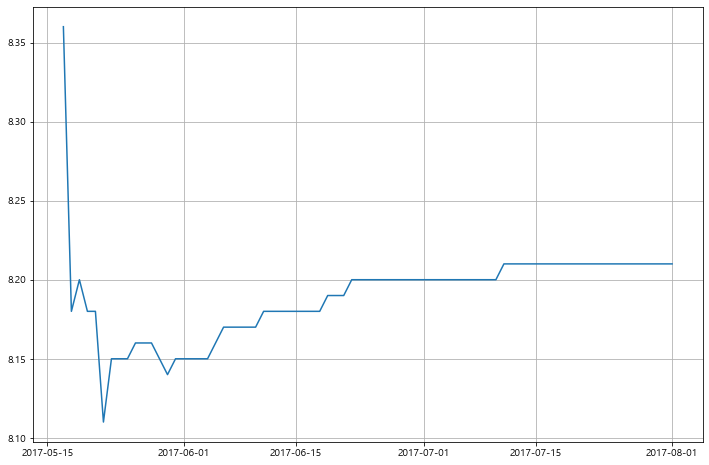

In [73]:
#시각화
plt.figure(figsize=(12,8))
plt.plot(tmp["date"], tmp["point"])
plt.grid()

In [74]:
# 영화별 날짜 변화에 따른 평점 변화확인
movie2 = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie2

movie2.columns = movie2.columns.droplevel()
movie2.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


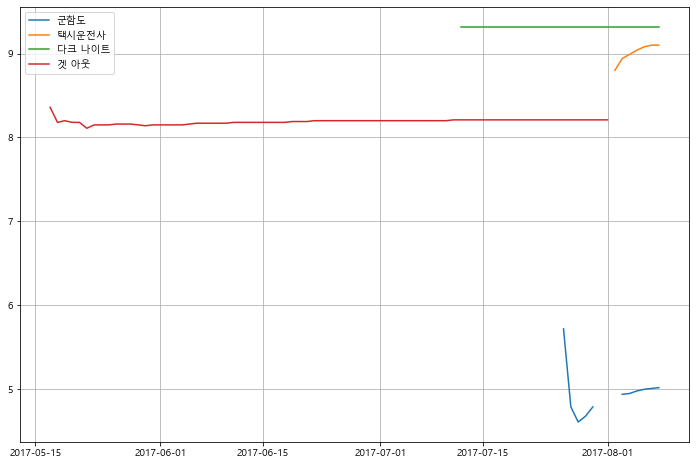

In [75]:
target_cols = ['군함도','택시운전사','다크 나이트','겟 아웃']
plt.figure(figsize=(12,8))
plt.plot(movie2[target_cols])
plt.legend(target_cols, loc='best')
plt.grid()

#### 로그인을 해야하는 경우

+ http
+ https

In [76]:
import requests

url = 'https://www.hanbit.co.kr/member/login_proc.php'

session = requests.session()
sess = session.post(url, {"m_id":"netsong7", "m_passwd":"xxx",
                  "return_url":"http://www.hanbit.co.kr"}) #return_url : 어느페이지로 돌아가줄까
#print(sess) # Response[200] : 접근승인

my_url = "https://www.hanbit.co.kr/myhanbit/myhanbit.html"
sess = session.get(my_url)
#print(sess.text)

soup = BeautifulSoup(sess.text, "html.parser")
mileage = soup.select_one(".mileage_section1 span").get_text()
ecoin = soup.select_one(".mileage_section2 span").get_text()

print("마일리지 : ", mileage)
print("이코인 : ", ecoin)

AttributeError: 'NoneType' object has no attribute 'get_text'

### Selenium

+ PhantomJS 또는 Chrome Driver
+ pip install selenium

In [77]:
!pip install selenium

In [2]:
from selenium import webdriver

In [3]:
driver = webdriver.Chrome("C:/Users/user/Documents/jun/analysis/data/chromedriver")
driver.get("https://naver.com")
#driver.save_screenshot('data/001.png') 캡쳐

In [84]:
#네이버
driver = webdriver.Chrome("C:/Users/user/Documents/jun/analysis/data/chromedriver")
driver.get('https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com')

In [85]:
elem_login = driver.find_element_by_id('id')
elem_login.clear()
elem_login.send_keys('rla1576') #아이디에 입력

elem_login = driver.find_element_by_id('pw')
elem_login.clear()
elem_login.send_keys('xxx')

xpath = """//*[@id="log.login"]"""
driver.find_element_by_xpath(xpath).click()

In [86]:
#다음
driver = webdriver.Chrome("C:/Users/user/Documents/jun/analysis/data/chromedriver")
driver.get('https://logins.daum.net/accounts/signinform.do?url=https%3A%2F%2Fwww.daum.net%2F')

In [87]:
elem_login = driver.find_element_by_id('id')
elem_login.clear()
elem_login.send_keys('rla1576') #아이디에 입력

elem_login = driver.find_element_by_id('inputPwd')
elem_login.clear()
elem_login.send_keys('xxx')

xpath = """//*[@id="loginBtn"]"""
driver.find_element_by_xpath(xpath).click()

WebDriverException: Message: chrome not reachable
  (Session info: chrome=87.0.4280.88)


#### 셀프 주유소는 정말 저렴한가?

+ http://www.opinet.co.kr

In [4]:
driver = webdriver.Chrome("C:/Users/user/Documents/jun/analysis/data/chromedriver")
driver.get('https://www.opinet.co.kr/searRgSelect.do')

In [12]:
# 시/도 목록 가져오기
si_list_raw = driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""") #목록이 펼쳐진 상태
si_list = si_list_raw.find_elements_by_tag_name("option")
si_names = [option.get_attribute('value') for option in si_list]
si_names.remove("")
si_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [13]:
# 시 선택하기
element = driver.find_element_by_id("SIDO_NM0")
element.send_keys(si_names[0])

In [15]:
# 구 목록 가져오기
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove("")
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [20]:
# 구 선택하기
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[2])

In [21]:
# 조회 버튼 누르기
xp = """//*[@id="searRgSelect"]/span"""
driver.find_element_by_xpath(xp).click()

In [22]:
# 엑셀 저장 버튼 누르기
xp = """//*[@id="glopopd_excel"]/span"""
driver.find_element_by_xpath(xp).click()

In [23]:
# 지역별(구별)로 주유소 정보를 엑셀파일로 저장
from tqdm import tqdm_notebook
import time

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(1)
    
    xp = """//*[@id="searRgSelect"]/span"""
    driver.find_element_by_xpath(xp).click()
    
    time.sleep(1)
    
    xp = """//*[@id="glopopd_excel"]/span"""
    driver.find_element_by_xpath(xp).click()
    
    time.sleep(1)
    
driver.close()    

<ipython-input-23-5d6f0afd82a0>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


In [30]:
# 저장된 엑셀파일 불러오기
from glob import glob

station_files = glob("C:/Users/user/Downloads/지역*.xls")
station_files

tmp_raw=[]
for fname in station_files:
    tmp = pd.read_excel(fname, header=2)
    tmp_raw.append(tmp)

In [31]:
tmp_raw
#len(tmp_raw)

25

In [33]:
station_raw= pd.concat(tmp_raw)
station_raw.head()
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      498 non-null    object
 1   상호      498 non-null    object
 2   주소      498 non-null    object
 3   상표      498 non-null    object
 4   전화번호    498 non-null    object
 5   셀프여부    498 non-null    object
 6   고급휘발유   498 non-null    object
 7   휘발유     498 non-null    object
 8   경유      498 non-null    object
 9   실내등유    498 non-null    object
dtypes: object(10)
memory usage: 42.8+ KB


In [40]:
stations = pd.DataFrame({"Oil_store":station_raw["상호"],
            "주소":station_raw["주소"],
            "가격":station_raw["휘발유"],
            "셀프":station_raw["셀프여부"],
            "상표":station_raw["상표"]})

stations.head()

,Oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1443,N,현대오일뱅크
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1448,N,GS칼텍스
2,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1456,Y,현대오일뱅크
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1459,Y,현대오일뱅크
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1468,Y,GS칼텍스


In [43]:
stations["구"] = [addr.split()[1] for addr in stations["주소"]]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1443,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1448,N,GS칼텍스,강동구
2,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1456,Y,현대오일뱅크,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1459,Y,현대오일뱅크,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1468,Y,GS칼텍스,강동구


In [44]:
stations["구"].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [54]:
stations[stations["가격"]=="-"]
stations = stations[stations["가격"] != "-"]

In [45]:
stations[stations["가격"]=="-"]

,Oil_store,주소,가격,셀프,상표,구
21,신성주유소,서울 동대문구 장한로 29 (장안동),-,N,현대오일뱅크,동대문구
11,망원동주유소,서울 마포구 월드컵로 119 (망원동),-,N,SK에너지,마포구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
35,전당앞주유소,서울 서초구 남부순환로 2391 (서초동),-,N,SK에너지,서초구
30,보라주유소,서울 영등포구 영등포로 399 (신길동),-,N,GS칼텍스,영등포구
31,성락주유소,서울 영등포구 가마산로 414 (신길동),-,Y,S-OIL,영등포구
13,수림석유 제3한강주유소,서울 용산구 한남대로 45 (한남동),-,N,GS칼텍스,용산구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,에스씨(주) 역전주유소,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
12,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,-,Y,GS칼텍스,금천구


In [47]:
stations.reset_index(inplace=True)

In [48]:
stations.head()

,index,Oil_store,주소,가격,셀프,상표,구
0,0,구천면주유소,서울 강동구 구천면로 357 (암사동),1443,N,현대오일뱅크,강동구
1,1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1448,N,GS칼텍스,강동구
2,2,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1456,Y,현대오일뱅크,강동구
3,3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1459,Y,현대오일뱅크,강동구
4,4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1468,Y,GS칼텍스,강동구


In [50]:
del stations["index"]

In [51]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1443,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1448,N,GS칼텍스,강동구
2,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1456,Y,현대오일뱅크,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1459,Y,현대오일뱅크,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1468,Y,GS칼텍스,강동구


In [56]:
stations["가격"] = [float(val) for val in stations["가격"]]
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 495
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  485 non-null    object 
 1   주소         485 non-null    object 
 2   가격         485 non-null    float64
 3   셀프         485 non-null    object 
 4   상표         485 non-null    object 
 5   구          485 non-null    object 
dtypes: float64(1), object(5)
memory usage: 26.5+ KB


<ipython-input-56-6d9abc840926>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["가격"] = [float(val) for val in stations["가격"]]


#### 데이터 분석

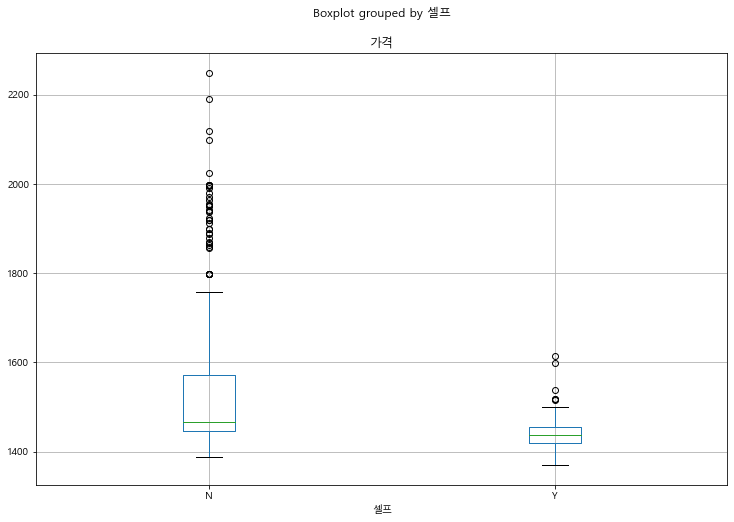

In [58]:
# 셀프 여부에 따른 가격 차이

stations.boxplot(column="가격", by="셀프", figsize=(12,8))

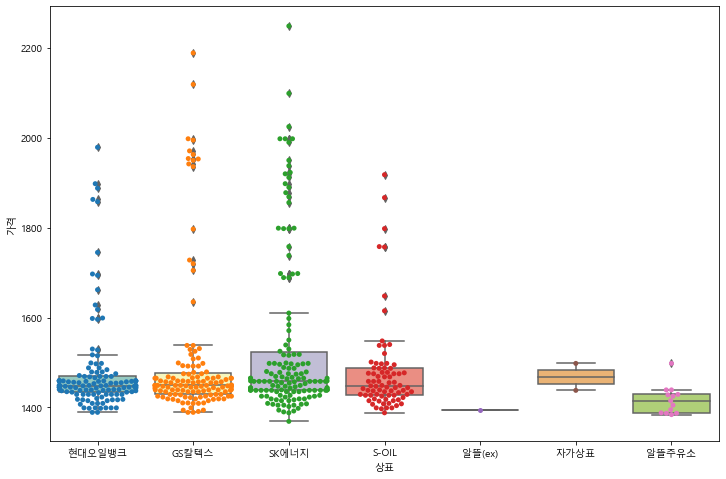

In [60]:
# 주유소의 상표별로 셀프 주유소가 얼마나 저렴한가?
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격",data=stations, palette="Set3")
sns.swarmplot(x="상표",y="가격", data=stations)

In [62]:
### 구별 주유 가격 확인

# 서울시에서 가장 주유 가격이 비싼 곳이 어디인가?
stations.sort_values(by="가격", ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
306,서남주유소,서울 중구 통일로 30,2249.0,N,SK에너지,중구
269,서계주유소,서울 용산구 청파로 367 (서계동),2189.0,N,GS칼텍스,용산구
305,필동주유소,서울 중구 퇴계로 196 (필동2가),2119.0,N,GS칼텍스,중구
304,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2099.0,N,SK에너지,중구
495,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구
296,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구
268,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
267,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구
295,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구
294,경복궁주유소,서울 종로구 율곡로 6 (중학동),1995.0,N,GS칼텍스,종로구


In [64]:
# 구별로 평균값 산출

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"])
gu_data.head()

,가격
구,
강남구,1602.078947
강동구,1507.687500
강북구,1417.538462
강서구,1458.696970
관악구,1462.500000
